<img src="images/logo_verde_horz.png" width="600">

<img src="images/title_visual.png" alt="Drawing" style="width: 780px;height: 150px; "/>  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Plots logarítmicos

Las funciones semilogx(), semilogy() y loglog() simplifican la creación de diagramas logarítmicos.

<ipython-input-13-02f163a56c51>:18: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax3.loglog(t, 20 * np.exp(-t / 10.0), basex=2)
<ipython-input-13-02f163a56c51>:27: MatplotlibDeprecationWarning: The 'nonposx' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax4.set_xscale("log", nonposx='clip')
<ipython-input-13-02f163a56c51>:28: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax4.set_yscale("log", nonposy='clip')


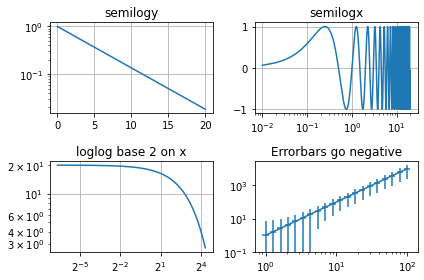

In [13]:
# Create figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

# Data for plotting
t = np.arange(0.01, 20.0, 0.01)

# log y axis
ax1.semilogy(t, np.exp(-t / 5.0))
ax1.set(title='semilogy')
ax1.grid()

# log x axis
ax2.semilogx(t, np.sin(2 * np.pi * t))
ax2.set(title='semilogx')
ax2.grid()

# log x and y axis
ax3.loglog(t, 20 * np.exp(-t / 10.0), basex=2)
ax3.set(title='loglog base 2 on x')
ax3.grid()

# With errorbars: clip non-positive values
# Use new data for plotting
x = 10.0**np.linspace(0.0, 2.0, 20)
y = x**2.0

ax4.set_xscale("log", nonposx='clip')
ax4.set_yscale("log", nonposy='clip')
ax4.set(title='Errorbars go negative')
ax4.errorbar(x, y, xerr=0.1 * x, yerr=5.0 + 0.75 * y)
# ylim debe configurarse después de la barra de errores para permitir que la barra de errores escale los 
# límites automáticamente
ax4.set_ylim(ymin=0.1)

fig.tight_layout()
plt.show()

## Plots polares 

La función polar () genera gráficos polares

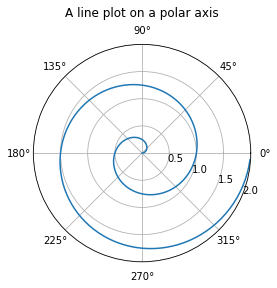

In [14]:
r = np.arange(0, 2, 0.01)           # np.arange(inicio,fin,paso)
theta = 2 * np.pi * r 

ax = plt.subplot(111, projection='polar')
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

# Gráficos de contornos

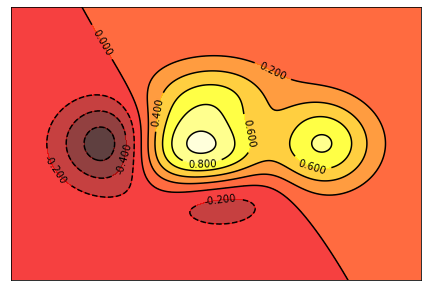

In [15]:
# Vamos a graficar la misma función del ejemplo de imshow, esta vez mostrando sus
# contornos o curvas de nivel
def f(x,y):
    return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)

n = 256
x = np.linspace(-3,3,n)
y = np.linspace(-3,3,n)
X,Y = np.meshgrid(x,y)

# creamos una ventana(axes) en la cuál enmarcar nuestra figura
# los números definen una posición para los bordes respecto a la figura total
plt.axes([0.025,0.025,0.95,0.95])

plt.contourf(X, Y, f(X,Y), 8, alpha=.75, cmap=plt.cm.hot)
C = plt.contour(X, Y, f(X,Y), 8, colors='black')
plt.clabel(C, inline=1, fontsize=10)

plt.xticks([]), plt.yticks([])
plt.show()

# Eje polar

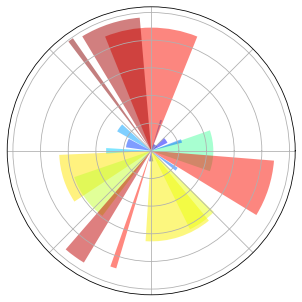

In [16]:
ax = plt.axes([0.025,0.025,1,1], polar=True)

N = 20
theta = np.arange(0.0, 2*np.pi, 2*np.pi/N)
radii = 10*np.random.rand(N)
width = np.pi/4*np.random.rand(N)
bars = plt.bar(theta, radii, width=width, bottom=0.0)

for r,bar in zip(radii, bars):
    bar.set_facecolor( plt.cm.jet(r/10.))
    bar.set_alpha(0.5)

ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

# Gráficos de barras

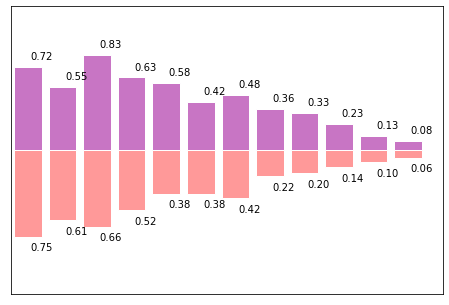

In [17]:
n = 12
X = np.arange(n)
Y1 = (1-X/float(n)) * np.random.uniform(0.5,1.0,n)
Y2 = (1-X/float(n)) * np.random.uniform(0.5,1.0,n)

plt.axes([0.025,0.025,1,1])
plt.bar(X, +Y1, facecolor='#c875c4', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

for x,y in zip(X,Y1):
    plt.text(x+0.4, y+0.05, '%.2f' % y, ha='center', va= 'bottom')

for x,y in zip(X,Y2):
    plt.text(x+0.4, -y-0.05, '%.2f' % y, ha='center', va= 'top')

plt.xlim(-.5,n), plt.xticks([])
plt.ylim(-1.25,+1.25), plt.yticks([])

plt.show()

# Gráficos de flechas

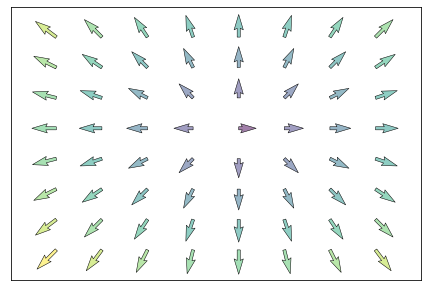

In [18]:
n = 8
X,Y = np.mgrid[0:n,0:n]
T = np.arctan2(Y-n/2.0, X-n/2.0)
R = 10+np.sqrt((Y-n/2.0)**2+(X-n/2.0)**2)
U,V = R*np.cos(T), R*np.sin(T)

plt.axes([0.025,0.025,0.95,0.95])
plt.quiver(X,Y,U,V,R, alpha=.5)
plt.quiver(X,Y,U,V, edgecolor='k', facecolor='None', linewidth=.5)

plt.xlim(-1,n), plt.xticks([])
plt.ylim(-1,n), plt.yticks([])

plt.show()

## Superficie 3D 

El kit de herramientas mplot3d tiene soporte para gráficos simples en 3D, que incluyen superficie, estructura alámbrica, dispersión y gráficos de barras.

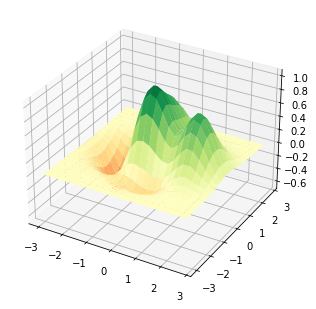

In [19]:
# Vamos a graficar la misma función del ejemplo de imshow, esta vez mostrándola en 3D

from mpl_toolkits.mplot3d import Axes3D

x = y = np.arange(-3.0, 3.0, 0.25) 
X, Y = np.meshgrid(x, y)

def f(x,y):
    return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)

Z1 = f(X,Y)

ax = Axes3D(plt.figure())    # creando el cubo
ax.plot_surface(X,Y,Z1,vmax=abs(Z1).max(), vmin=-abs(Z1).max(), cmap=cm.RdYlGn, rstride=1,cstride=1)
plt.show()

Ejemplos originales tomados de <https://www.labri.fr/perso/nrougier/teaching/matplotlib/#other-types-of-plots>  

Para descubrir más opciones: <https://matplotlib.org/gallery.html>  